**Linear Regression**

In [35]:
import numpy as np
import matplotlib.pyplot as plt

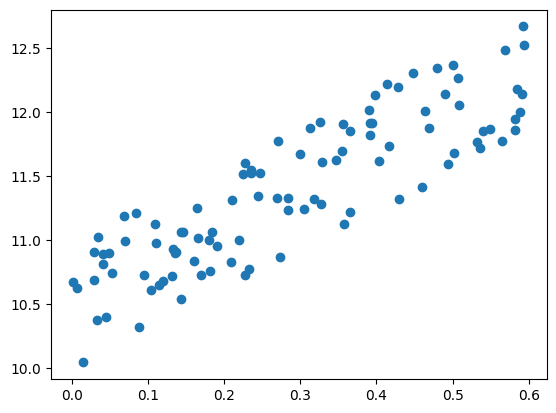

In [36]:
m = 100
x = 0.6 * np.random.rand(m,1)
y = 10 + 3 * x + np.random.rand(m,1)

plt.scatter(x,y,marker='o')

In [37]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(x) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [38]:
theta_best

array([[10.57057572],
       [ 2.841777  ]])

In [39]:
x_new = np.array([[0], [0.6]])
x_new_b = add_dummy_feature(x_new)
y_predict = x_new_b @ theta_best
y_predict

array([[10.57057572],
       [12.27564192]])

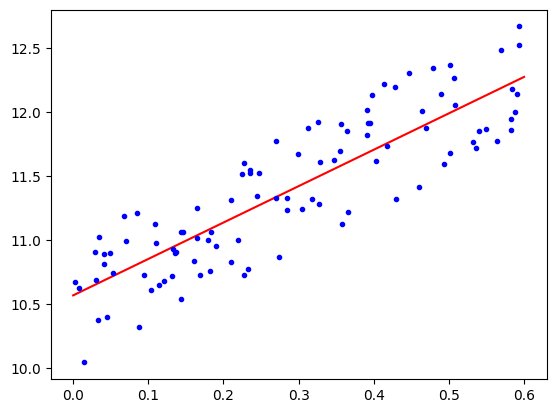

In [40]:
plt.plot(x_new, y_predict, "r-", label="Predictions")
plt.plot(x, y, "b.")
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([10.57057572]), array([[2.841777]]))

In [42]:
lin_reg.predict(x_new)

array([[10.57057572],
       [12.27564192]])

In [43]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[10.57057572],
       [ 2.841777  ]])

In [44]:
np.linalg.pinv(X_b) @ y

array([[10.57057572],
       [ 2.841777  ]])

**Polynomial Regression**

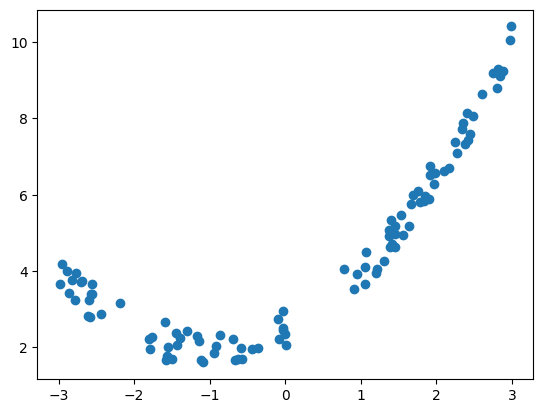

In [45]:
m = 100
x = 6*np.random.rand(m,1) -3
y = 0.5 * x ** 2 + x + 2 + np.random.rand(m,1)
plt.scatter(x,y,marker='o')

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [47]:
x[0],x_poly[0]

(array([2.60561858]), array([2.60561858, 6.78924818]))

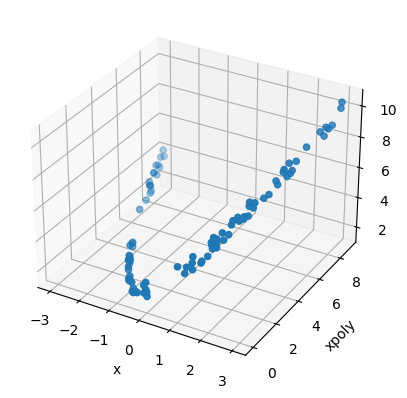

In [48]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x,x_poly[:,1],y)
ax.set_xlabel('x')
ax.set_ylabel('xpoly')
ax.set_zlabel('y')
plt.show()

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.44180743]), array([[0.99405465, 0.50784   ]]))

In [50]:
x_new = [i for i in np.linspace(-3,3,100)]
y_predict = [(0.49907578*u**2 + 1.00695321*u + 2.53805111) for u in x_new]

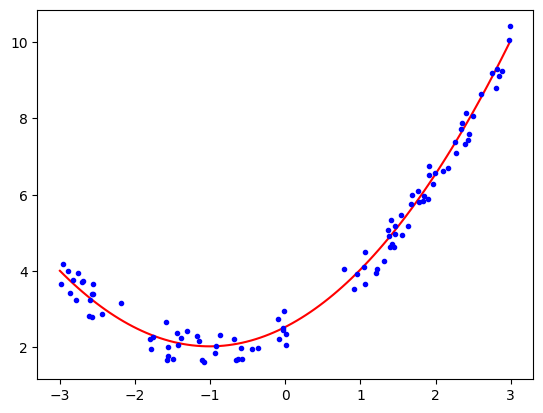

In [51]:
plt.plot(x_new, y_predict, "r", label="Predictions")
plt.plot(x, y, "b.")
plt.show()

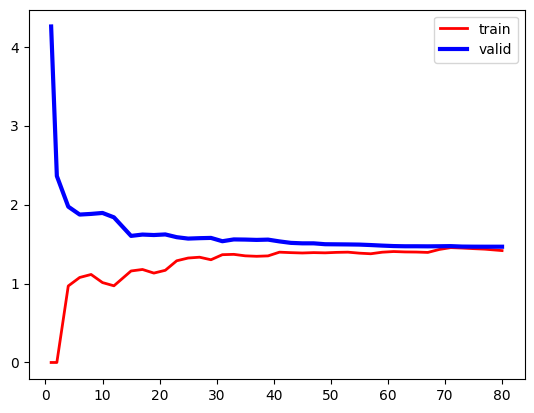

In [52]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),x,y,train_sizes=np.linspace(0.01,1.0,40), cv=5,
    scoring = "neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend()
plt.show()

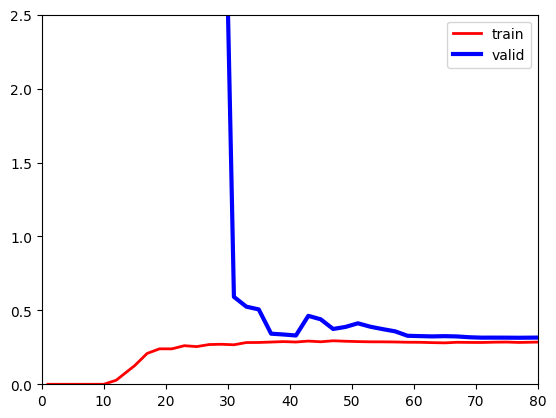

In [53]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())


train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,x,y,train_sizes=np.linspace(0.01,1.0,40), cv=5,
    scoring = "neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlim(0, 80)
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [54]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[5.71915956]])

In [55]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([5.68239731])

In [56]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([5.68343985])

In [57]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [58]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

x_train,x_test,y_train,y_test = train_test_split(X,y)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

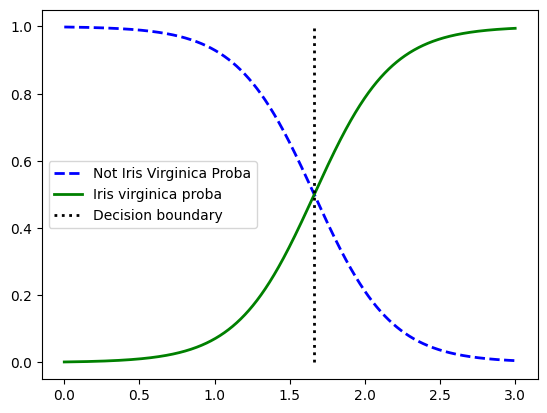

In [60]:
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(x_new)
decision_boundary = x_new[y_proba[:,1] >= 0.5][0,0]

plt.plot(x_new,y_proba[:,0], "b--", linewidth=2,
         label="Not Iris Virginica Proba")
plt.plot(x_new,y_proba[:,1],"g-",linewidth=2,label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
label="Decision boundary")
plt.legend()
plt.show()

In [61]:
decision_boundary

1.6636636636636637

In [62]:
log_reg.predict([[1.7],[1.5]])

array([ True, False])

In [63]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [64]:
softmax_reg = LogisticRegression(C=30)
softmax_reg.fit(x_train, y_train)

LogisticRegression(C=30)

In [65]:
softmax_reg.predict([[5, 2]])

array([2])

In [66]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.02, 0.98]])